# Geodatenanalyse 1

## Tag 5 / Block 2 / Übung 14: Logistische Regression

Für dieses Beispiel zur logistischen Regression in Python werden wir einen Datensatz aus Gelman et al. (2020) " Regression and Other Stories"  (Kapitel 13.5) nehmen. Dieser enthält Daten zu einer Umfrage, inwieweit Menschen in Bangladesch bereit sind ihren Trinkwasserbrunnen zu wechseln ("ja", "nein"), sowie Angaben zur Arsenkonzentration ("arsenic"), zur Distanz zum nächsten (nicht Arsen-belasteten) Brunnen ("dist" und "dist100"), ob der Befragte Mitglied einer Gemeinde-Vereinigung o.ä. ist ("assoc"), und Angaben zum Bildungsniveau der Befragten ("edu" und "edu4"). 

Lest die entsprechenden Daten aus "wells.csv" in Euer Notebook ein.



In [1]:
import pandas as pd
data = pd.read_csv('wells.csv', sep=',', encoding='cp1252')

### Explorative Datenanalyse

Für eine logistische Regression müssen wir zuerst sicherstellen, dass die abhängige Variable (Brunnen wechseln: ja = 1 / nein = 0) eine ausgeglichene Anzahl der Werte "0" und "1" hat (+/- 20% sind okay). Dies könnt Ihr z.B. graphisch machen, mit Hilfe von `seaborn.countplot()`.

Gebt dafür als Inputs "x=..." die unabhängige Variable, und "data=..." den gesamten Datensatz an.    


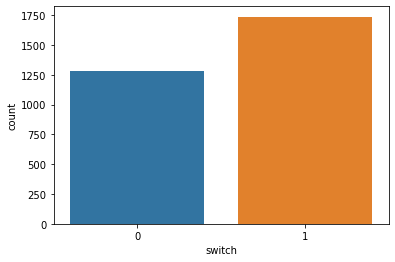

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data['switch'], data=data)
plt.show()

Speichert nun die unabhängige Variable separat als "Series", und die abhängigen Variablen "arsenic" und "dist100" in einem eigenen DataFrame ab. Plottet anschließend die beiden abhängigen Variablen als Histogramme und Scattplots (z.B. `seaborn.pairplot(X)`), um zu beurteilen ob Korrelationen zwischen den Parametern vorhanden sind. 

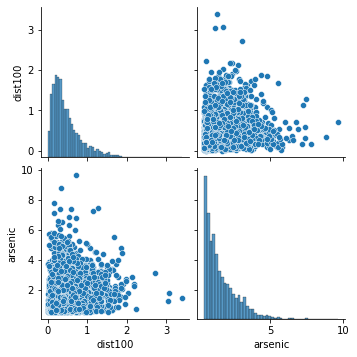

In [3]:
import numpy as np
y = data['switch']
X = pd.DataFrame(np.c_[data['dist100'], data['arsenic']], columns = ['dist100','arsenic'])

sns.pairplot(X)
plt.show()

Wie in der letzten Übung, teilt nun die beiden Datensätze in Trainingsdaten zur Modellierung und Testdaten zum späteren Evaluieren der Modellanpassung auf.  

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

### Logistische Regression mit `statsmodels`

Als nächstes erstellen wir ein logistisches Modell mit Hilfe von `statsmodels.api` und der Funktion `Logit()`. Gebt dabei als Inputs die eben erzeugten entsprechenden Trainingsdaten an. Lasst Euch in einem zweiten Schritt dann die Ergebnisse des angepassten Modells mit der Funktion `.fit()` erzeugen. Über den Befehl "print(Ergebnisse.summary())" könnt Ihr Euch eine Zusammenfassung der Anpassung anzeigen lassen.

In [5]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650795
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 switch   No. Observations:                 2416
Model:                          Logit   Df Residuals:                     2414
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Feb 2021   Pseudo R-squ.:                 0.04470
Time:                        11:55:32   Log-Likelihood:                -1572.3
converged:                       True   LL-Null:                       -1645.9
Covariance Type:            nonrobust   LLR p-value:                 7.322e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dist100       -0.8925      0.105     -8.487      0.000      -1.099      -0.686
arsenic        0.4560      0.

Die Zusammenfassung zeigt übersichtlich nochmal alle Einstellungen und Kennwerte der Modellanpassung. Unter anderen könnt Ihr hier Koeffizienten der Regression, sowie die p-Werte der Parameter nachschauen und interpretieren. 

### Logistische Regression mit `scikit-learn`

Als nächstes führen wir eine logistische Regression mit `scikit-learn` durch. Die Objekte darin haben mehr Funktionen in Bezug auf verschiedene Optimierungsalgorithmen, Evaluierungskriterien usw. 

Definiert Euch zuerst ein Regressionsobjekt über `sklearn.linear_model.LogisticRegression()`, unter der Angabe von "C = 0.1" um die Stärke der Regularisation anzupassen. Führt danach mit dem erzeugten Regressionsobjekt die Anpassung an die Trainingsdaten durch (`object.fit()`). 

In [6]:
from sklearn.linear_model import LogisticRegression # model algorithm
lr = LogisticRegression(C = 0.1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

Mit dem gleichen Objekt könnt ihr nun mit `.predict()` Vorhersagen an den X-Werten des Testdatensatzen machen.

In [7]:
y_pred = lr.predict(X_test)

Jetzt wollen wir die Modellanpassung evaluieren. Dazu werden wir uns einige Beispiele, wie den Jaccard-Index, die Wahrheitsmattrix und die Trefferquote ausgeben lassen. 

`sklearn.metrics` enthält die vordefinierten Funktionen `jaccard_score()` und `confusion_matrix()`. Wendet diese auf die entsprechenden Test- und Trainingsdaten an, und interpretiert die Werte. 

In [9]:
from sklearn.metrics import jaccard_score as jss # evaluation metric
jacard = jss(y_test, y_pred)
print(jacard)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

0.551594746716698
[[ 71 190]
 [ 49 294]]


Bestimmt nun basierend auf der Wahrheitsmatrix die Trefferquote des logistischen Regressionsmodells. Vergleicht das Ergebniss mit dem Wert des Jaccard-Index.   

In [10]:
Treffer = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print (Treffer)

0.5916666666666667


Als letztes, stellt nun noch die Ergebnisse der logistischen Regression graphisch dar. Plottet dazu die Werte von abhängigen Variable als Scatterplot über die beiden betrachteten unabhängigen Variablen ("arsenic" und "dist100"). 

Für die Darstellung der angepassten logistischen Regressionskurve erzeugt Euch zuerst mit Hilfe von `numpy.linspace()` geeignete Werte für die jeweilige abhängige Variable. Um die entsprechenden unabhängigen Werte zu berechnen, könnt Ihr `scipy.special.expit()` benutzen. Damit können Werte für logistische Funktionen berechnet werden. 

Als Input benötigt diese Funktion den folgenden Ausdruck: `X * Regressionsobjekt.coef_ + Regressionsobjekt.intercept_`. Passt diesen Ausdruck in Bezug auf die Indizes entsprechend an, um Euch für beide Parameter Werte für die Darstellung der logistischen Funktion erzeugen zu lassen. 

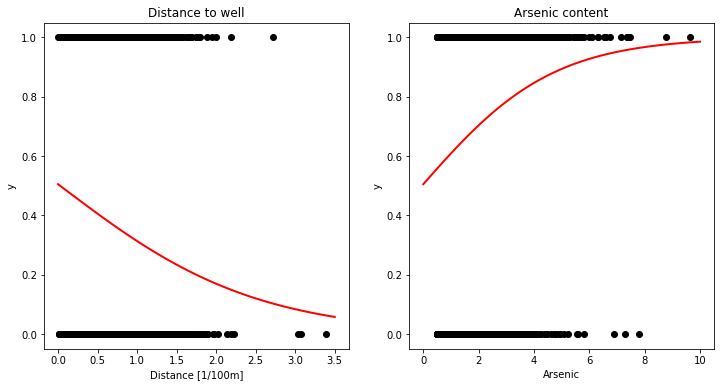

In [11]:
from scipy.special import expit

fig = plt.figure(1, figsize=(12, 6))

ax = fig.add_subplot(1,2,1)
ax.scatter(X.dist100, y, color='black', zorder=20)

X_plot = np.linspace(0, 3.5, 100)
loss_dis = expit(X_plot * lr.coef_[0, 0] + lr.intercept_)
ax.plot(X_plot, loss_dis, color='red', linewidth=2)

ax.set_ylabel('y')
ax.set_xlabel('Distance [1/100m]')
ax.set_title('Distance to well')

ax1 = fig.add_subplot(1,2,2)
ax1.scatter(X.arsenic, y, color='black', zorder=20)

X_plot = np.linspace(0, 10, 100)
loss_as = expit(X_plot * lr.coef_[0, 1] + lr.intercept_)
ax1.plot(X_plot, loss_as, color='red', linewidth=2)

ax1.set_ylabel('y')
ax1.set_xlabel('Arsenic')
ax1.set_title('Arsenic content')

plt.show()




## Ende

### Referenzen: 

Gelman et al. (2020) Regression and Other Stories, Cambridge University Press

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://medium.com/codex/machine-learning-logistic-regression-with-python-5ed4ded9d146

